Inflation and grocery price and wages

In [1]:
# import dependence
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# import files needed
inflation_data = pd.read_csv("C:\Data Analytic\Project-1\inflation.csv")
cpi_food = pd.read_csv("C:\Data Analytic\Project-1\cpi_u_food_by_year_unseasoned.csv")
minimum_wage = pd.read_csv("C:\Data Analytic\Project-1\EPI Data Library - Minimum wage changeable.csv")
#food_price = pd.read_csv("C:\Data Analytic\Project-1\rice_beef_coffee_price_changes.csv")


In [3]:
#raw inflation data with cpi
inflation_data.tail()

,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
105,105,2018.0,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
106,106,2019.0,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
107,107,2020.0,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
108,108,2021.0,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802
109,109,2022.0,281.148,283.716,287.504,289.109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#raw food inflation data with food cpi
cpi_food.head()

,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,0,2000.0,166.1,166.3,166.5,166.6,167.3,167.3,168.1,168.7,168.9,169.1,168.9,170.0,167.8,166.7,169.0
1,1,2001.0,170.9,171.3,171.7,171.9,172.5,173.0,173.5,173.9,174.1,174.9,174.6,174.7,173.1,171.9,174.3
2,2,2002.0,175.8,175.9,176.1,176.2,175.8,175.8,176.0,176.0,176.4,176.5,176.8,177.3,176.2,175.9,176.5
3,3,2003.0,177.5,178.3,178.6,178.4,178.8,179.6,179.7,180.4,180.7,181.7,182.4,183.6,180.0,178.5,181.4
4,4,2004.0,183.8,184.1,184.4,184.5,186.1,186.3,186.8,186.8,186.7,187.9,188.2,188.5,186.2,184.9,187.5


In [5]:
# raw federal minimum wage data with adjusted real minimum wage
mi = minimum_wage
mi = mi.head(13)
mi

,Date,Federal minimum wage (nominal dollars Jan 01),Federal minimum wage( real value 2022-06-01),Average wages of production and nonsupervisory workers,Federal minimum wage as a share of average wages of production and nonsupervisory workers,Unnamed: 5
0,2022,$7.25,$7.59,$7.25,$24.67,29.40%
1,2021,$7.25,$8.17,$23.80,30.80%,NaN
2,2020,$7.25,$8.27,$23.41,31.90%,NaN
3,2019,$7.25,$8.47,$23.28,32.90%,NaN
4,2018,$7.25,$8.61,$23.22,33.70%,NaN
5,2017,$7.25,$8.78,$22.98,34.50%,NaN
6,2016,$7.25,$9.00,$22.55,35.20%,NaN
7,2015,$7.25,$9.13,$22.40,36.00%,NaN
8,2014,$7.25,$9.13,$22.28,36.70%,NaN
9,2013,$7.25,$9.27,$22.41,37.30%,NaN


In [6]:
mi.dtypes

Date                                                                                          int64
Federal minimum wage (nominal dollars Jan 01)                                                object
Federal minimum wage( real value 2022-06-01)                                                 object
Average wages of production and nonsupervisory workers                                       object
Federal minimum wage as a share of average wages of production and nonsupervisory workers    object
Unnamed: 5                                                                                   object
dtype: object

In [7]:
mi_rename = mi.rename(columns={"Date": "Year"})
mi_rename

,Year,Federal minimum wage (nominal dollars Jan 01),Federal minimum wage( real value 2022-06-01),Average wages of production and nonsupervisory workers,Federal minimum wage as a share of average wages of production and nonsupervisory workers,Unnamed: 5
0,2022,$7.25,$7.59,$7.25,$24.67,29.40%
1,2021,$7.25,$8.17,$23.80,30.80%,NaN
2,2020,$7.25,$8.27,$23.41,31.90%,NaN
3,2019,$7.25,$8.47,$23.28,32.90%,NaN
4,2018,$7.25,$8.61,$23.22,33.70%,NaN
5,2017,$7.25,$8.78,$22.98,34.50%,NaN
6,2016,$7.25,$9.00,$22.55,35.20%,NaN
7,2015,$7.25,$9.13,$22.40,36.00%,NaN
8,2014,$7.25,$9.13,$22.28,36.70%,NaN
9,2013,$7.25,$9.27,$22.41,37.30%,NaN


In [8]:
foodandcpi_df = pd.merge(inflation_data, cpi_food, on=["Year"], how="inner")
#foodandcpi_df = foodandcpi_df.dropna()
selected_years = foodandcpi_df.loc[foodandcpi_df["Year"] >= 2011 , :]
selected_years
selected_years = selected_years[['Year','Jan_x','Jan_y','Feb_x','Feb_y','Mar_x','Mar_y','Apr_x','Apr_y','May_x','May_y','Jun_x','Jun_y','Jul_x','Jul_y','Aug_x','Aug_y','Sep_x','Sep_y','Oct_x','Oct_y','Nov_x','Nov_y','Dec_x','Dec_y']]
selected_years

,Year,Jan_x,Jan_y,Feb_x,Feb_y,Mar_x,Mar_y,Apr_x,Apr_y,May_x,...,Aug_x,Aug_y,Sep_x,Sep_y,Oct_x,Oct_y,Nov_x,Nov_y,Dec_x,Dec_y
11,2011.0,220.223,222.912,221.309,223.799,223.467,225.350,224.906,226.150,225.964,...,226.545,229.554,226.889,230.573,226.421,231.017,226.230,230.790,225.672,231.301
12,2012.0,226.665,232.666,227.663,232.486,229.392,232.792,230.085,233.234,229.815,...,230.379,234.156,231.407,234.298,231.317,234.878,230.221,234.896,229.601,235.390
13,2013.0,230.280,236.341,232.166,236.301,232.773,236.332,232.531,236.841,232.945,...,233.877,237.406,234.149,237.522,233.546,237.871,233.069,237.641,233.049,237.869
14,2014.0,233.916,238.872,234.781,239.608,236.293,240.398,237.072,241.337,237.900,...,237.852,243.811,238.031,244.630,237.433,245.166,236.151,245.192,234.812,245.976
15,2015.0,233.707,246.538,234.722,246.680,236.119,246.045,236.599,246.121,237.805,...,238.316,247.671,237.945,248.632,237.838,249.052,237.336,248.306,236.525,247.903
16,2016.0,236.916,248.631,237.111,248.800,238.132,247.978,239.261,248.413,240.229,...,240.849,247.719,241.428,247.917,241.729,248.073,241.353,247.435,241.432,247.313
17,2017.0,242.839,248.242,243.603,248.791,243.801,249.165,244.524,249.739,244.733,...,245.519,250.493,246.819,250.993,246.663,251.364,246.669,250.871,246.524,251.238
18,2018.0,247.867,252.361,248.991,252.266,249.554,252.370,250.546,253.209,251.588,...,252.146,254.077,252.439,254.393,252.885,254.358,252.038,254.379,251.233,255.210
19,2019.0,251.712,256.417,252.776,257.222,254.202,257.724,255.548,257.708,256.092,...,256.558,258.410,256.759,258.943,257.346,259.632,257.208,259.467,256.974,259.823
20,2020.0,257.971,261.057,258.678,261.876,258.115,262.708,256.389,266.757,256.394,...,259.918,269.079,260.280,269.163,260.388,269.828,260.229,269.069,260.474,270.023


In [9]:
selected_years.dtypes

Year     float64
Jan_x    float64
Jan_y    float64
Feb_x    float64
Feb_y    float64
Mar_x    float64
Mar_y    float64
Apr_x    float64
Apr_y    float64
May_x    float64
May_y    float64
Jun_x    float64
Jun_y    float64
Jul_x    float64
Jul_y    float64
Aug_x    float64
Aug_y    float64
Sep_x    float64
Sep_y    float64
Oct_x    float64
Oct_y    float64
Nov_x    float64
Nov_y    float64
Dec_x    float64
Dec_y    float64
dtype: object

In [10]:
yearly_inflation = inflation_data.loc[inflation_data["Year"] >= 2011]
#yearly_inflation = yearly_inflation.loc[yearly_inflation["Jan"]]
yearly_inflation = yearly_inflation.drop(yearly_inflation.columns[[0,3,4,5,6,7,8,9,10,11,12,13]], axis=1, inplace=False)
#other_months = yearly_inflation.pop("Feb")
yearly_inflation

,Year,Jan
98,2011.0,220.223
99,2012.0,226.665
100,2013.0,230.280
101,2014.0,233.916
102,2015.0,233.707
103,2016.0,236.916
104,2017.0,242.839
105,2018.0,247.867
106,2019.0,251.712
107,2020.0,257.971


In [11]:
foodprice_change = cpi_food.loc[cpi_food["Year"] >= 2011]
foodprice_change = foodprice_change.drop(foodprice_change.columns[[0,3,4,5,6,7,8,9,10,11,12,13,14,15,16]], axis=1, inplace=False)
foodprice_change

,Year,Jan
11,2011.0,222.912
12,2012.0,232.666
13,2013.0,236.341
14,2014.0,238.872
15,2015.0,246.538
16,2016.0,248.631
17,2017.0,248.242
18,2018.0,252.361
19,2019.0,256.417
20,2020.0,261.057


In [29]:
# create list for % of inflation
jan_list = []
for i in foodprice_change["Jan"]:
    jan_list.append(i)
inflation_list = []
#jan_list.append(300)
for j in range(len(jan_list)-1):
    inflation_list.append(((jan_list[j+1]/jan_list[j])-1)*100)
#inflation_list.append(0)
#inflation_df = foodprice_change
#inflation_df["Jan"] = inflation_list
inflation_list

[4.375717772035603,
 1.5795174198206974,
 1.07091025255881,
 3.20925014233564,
 0.8489563475001738,
 -0.15645675720245,
 1.6592679723817838,
 1.6072214010881103,
 1.8095524087716752,
 3.784997146217095,
 6.951405856690451]

In [13]:
foodprice_change["Inflation"] = inflation_list
food_inflation_df = foodprice_change.loc[foodprice_change["Year"] < 2022, :]
del food_inflation_df["Jan"]
food_inflation_df["Year"] = food_inflation_df["Year"].map("{:.0f}".format)
food_inflation_df["Inflation"] = food_inflation_df["Inflation"].map("{:.2f}%".format)
food_inflation_df

C:\Users\yh_l2\AppData\Local\Temp\ipykernel_6568\538707798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_inflation_df["Year"] = food_inflation_df["Year"].map("{:.0f}".format)
C:\Users\yh_l2\AppData\Local\Temp\ipykernel_6568\538707798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_inflation_df["Inflation"] = food_inflation_df["Inflation"].map("{:.2f}%".format)


,Year,Inflation
11,2011,4.38%
12,2012,1.58%
13,2013,1.07%
14,2014,3.21%
15,2015,0.85%
16,2016,-0.16%
17,2017,1.66%
18,2018,1.61%
19,2019,1.81%
20,2020,3.78%


In [14]:
food_inflation_df.dtypes

Year         object
Inflation    object
dtype: object

In [26]:
jan_list_general = []
for i in yearly_inflation["Jan"]:
    jan_list_general.append(i)
inflation_list_general = []

for j in range(len(jan_list_general)-1):
    inflation_list_general.append(((jan_list_general[j+1]/jan_list_general[j])-1)*100)
#inflation_list_general.append(0)
inflation_list_general

[2.9252167121508466,
 1.5948646681225531,
 1.5789473684210575,
 -0.08934831306964819,
 1.3730868138309926,
 2.5000422090529995,
 2.0705076202751638,
 1.5512351381991252,
 2.4865719552504606,
 1.3997697415600863,
 7.479872468289117]

In [16]:
yearly_inflation["Inflation"] = inflation_list_general
general_inflation_df = yearly_inflation.loc[yearly_inflation["Year"] < 2022, :]
del general_inflation_df["Jan"]
general_inflation_df["Year"] = general_inflation_df["Year"].map("{:.0f}".format)
general_inflation_df["Inflation"] = general_inflation_df["Inflation"].map("{:.2f}%".format)
general_inflation_df

C:\Users\yh_l2\AppData\Local\Temp\ipykernel_6568\14387894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_inflation_df["Year"] = general_inflation_df["Year"].map("{:.0f}".format)
C:\Users\yh_l2\AppData\Local\Temp\ipykernel_6568\14387894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_inflation_df["Inflation"] = general_inflation_df["Inflation"].map("{:.2f}%".format)


,Year,Inflation
98,2011,2.93%
99,2012,1.59%
100,2013,1.58%
101,2014,-0.09%
102,2015,1.37%
103,2016,2.50%
104,2017,2.07%
105,2018,1.55%
106,2019,2.49%
107,2020,1.40%


In [17]:
minimum_wage_all = mi_rename.drop(mi_rename.columns[[3,4,5]], axis=1, inplace=False)
minimum_wage_all = minimum_wage_all.loc[minimum_wage_all["Year"] > 2010, :]
minimum_wage_all
#foodprice_change.drop(foodprice_change.columns[[3,4]], axis=1, inplace=False)

,Year,Federal minimum wage (nominal dollars Jan 01),Federal minimum wage( real value 2022-06-01)
0,2022,$7.25,$7.59
1,2021,$7.25,$8.17
2,2020,$7.25,$8.27
3,2019,$7.25,$8.47
4,2018,$7.25,$8.61
5,2017,$7.25,$8.78
6,2016,$7.25,$9.00
7,2015,$7.25,$9.13
8,2014,$7.25,$9.13
9,2013,$7.25,$9.27


In [18]:
minimum_wage_all.dtypes

Year                                              int64
Federal minimum wage (nominal dollars Jan 01)    object
Federal minimum wage( real value 2022-06-01)     object
dtype: object

In [19]:
merged_df1 = pd.merge(food_inflation_df, general_inflation_df, on=["Year"], how="inner")
merged_df1
all_inflation = merged_df1.rename(columns={"Inflation_x": "Annual food inflation rate %",
                                                "Inflation_y": "Annual inflation rate %"})
all_inflation

,Year,Annual food inflation rate %,Annual inflation rate %
0,2011,4.38%,2.93%
1,2012,1.58%,1.59%
2,2013,1.07%,1.58%
3,2014,3.21%,-0.09%
4,2015,0.85%,1.37%
5,2016,-0.16%,2.50%
6,2017,1.66%,2.07%
7,2018,1.61%,1.55%
8,2019,1.81%,2.49%
9,2020,3.78%,1.40%


In [20]:
all_inflation.dtypes

Year                            object
Annual food inflation rate %    object
Annual inflation rate %         object
dtype: object

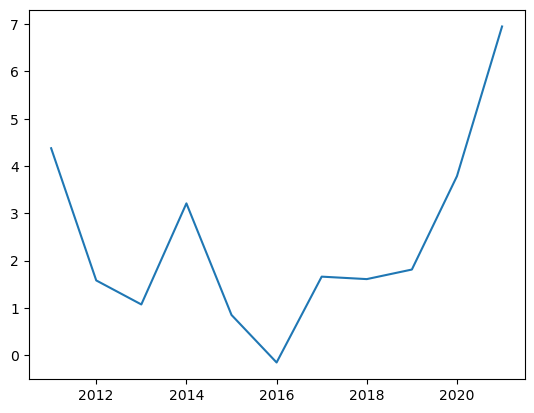

In [30]:
Year = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
plt.plot(Year,inflation_list)
plt.show()


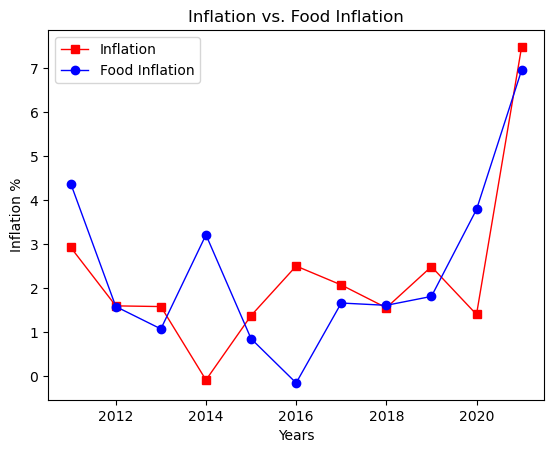

In [52]:
Inflation, = plt.plot(Year, inflation_list_general, marker="s",color="red", linewidth=1, label="Inflation")
Food_Inflation, = plt.plot(Year, inflation_list, marker="o",color="blue", linewidth=1, label="Food Inflation")
plt.legend(handles=[Inflation, Food_Inflation], loc="best")
plt.xlabel("Years")
plt.ylabel("Inflation %")
plt.title("Inflation vs. Food Inflation")
#plt.savefig("C:\Data Analytic\Project-1\Inflation_comparison.png")
plt.show()

This line graph show the trend of inflation and food inflation. From the graph, you can see the trend of inflation and food inflation is generally following each other except 2014 to 2016. 

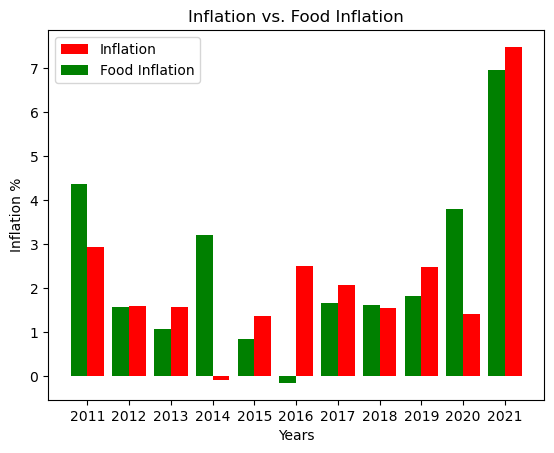

In [98]:
X_axis = np.arange(len(Year))
inflation = plt.bar(X_axis + 0.2, inflation_list_general, 0.4, color = "red", label = "Inflation")
food_inflation = plt.bar(X_axis - 0.2, inflation_list, 0.4, color = "green", label = "Food Inflation")
plt.xticks(X_axis, Year)
plt.xlabel("Years")
plt.ylabel("Inflation %")
plt.title("Inflation vs. Food Inflation")
plt.legend(handles=[inflation, food_inflation], loc="best")
#plt.savefig("C:\Data Analytic\Project-1\Inflation_bargraph.png")
plt.show()

This bar graph is nice for comparison for inflation in general and food inflation. From this chart, you can see two inflations following each other except 2014,2016 and 2020. I assume the phenomenon is due to food inflation is more sensitive to monetary policy issued by central bank. Since food is basic needs and the demand won't decrease even if the money depreciate. 

In [70]:
minimum_wage_list = [7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25]
real_minimum_wage_list = [9.70,9.43,9.27,9.13,9.13,9.00,8.78,8.61,8.47,8.27,8.17]

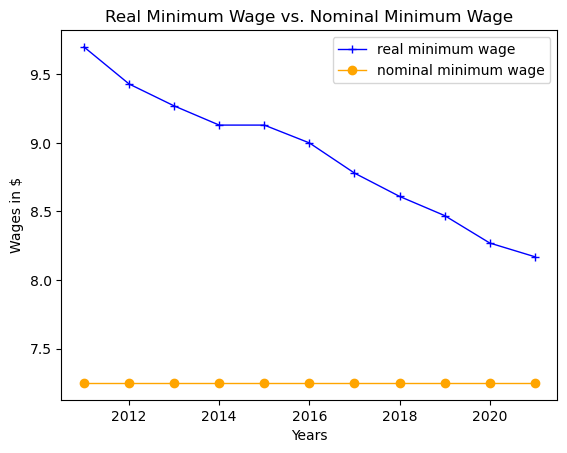

In [96]:
real_minimum_wage, = plt.plot(Year, real_minimum_wage_list, color="blue", marker = "+", linewidth=1, label="real minimum wage")
nominal_wage, = plt.plot(Year, minimum_wage_list, color="orange", marker = "o", linewidth=1, label="nominal minimum wage")
plt.legend(handles=[real_minimum_wage, nominal_wage], loc="best")
plt.xlabel("Years")
plt.ylabel("Wages in $")
plt.title("Real Minimum Wage vs. Nominal Minimum Wage")
#plt.savefig("C:\Data Analytic\Project-1\minimum wage.png")
plt.show()

This graph shows the nominal minimum wage doesn't change with the inflation but the blue line shows the the money depreciate due to the inflation. You can easily see how the purchasing power of minimum wage decreased with inflation. 

In [106]:
all_list = {"Year": Year, "Nominal Minimum Wage": minimum_wage_list, "Real Minimum Wage": real_minimum_wage_list,
             "Inflation": inflation_list_general, "Food Inflation": inflation_list}
allseries_df = pd.DataFrame(data=all_list)
allseries_df

,Year,Nominal Minimum Wage,Real Minimum Wage,Inflation,Food Inflation
0,2011,7.25,9.70,2.925217,4.375718
1,2012,7.25,9.43,1.594865,1.579517
2,2013,7.25,9.27,1.578947,1.070910
3,2014,7.25,9.13,-0.089348,3.209250
4,2015,7.25,9.13,1.373087,0.848956
5,2016,7.25,9.00,2.500042,-0.156457
6,2017,7.25,8.78,2.070508,1.659268
7,2018,7.25,8.61,1.551235,1.607221
8,2019,7.25,8.47,2.486572,1.809552
9,2020,7.25,8.27,1.399770,3.784997


In [100]:
allseries_df.dtypes

Real Minimum Wage       float64
Nominal Minimum Wage    float64
Inflation               float64
Food Inflation          float64
dtype: object

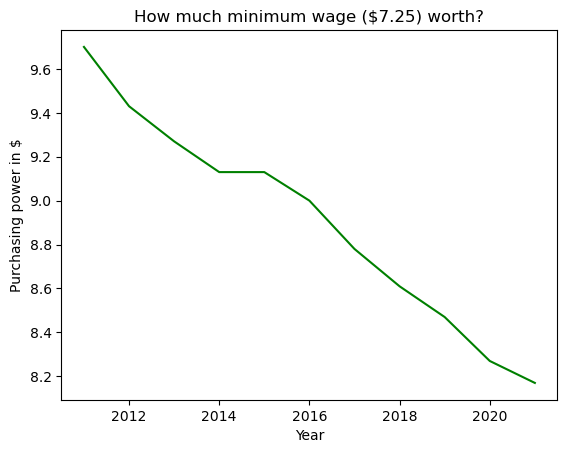

In [120]:
plt.plot(Year, real_minimum_wage_list, color="green", label="Real Minimum Wage")
#plt.plot(Year, inflation_list_general, color="orange", label="Inflation Rate %")
plt.title("How much minimum wage ($7.25) worth?")
plt.xlabel("Year")
plt.ylabel("Purchasing power in $")
#plt.savefig("C:\Data Analytic\Project-1\value depreciate.png")
plt.show()

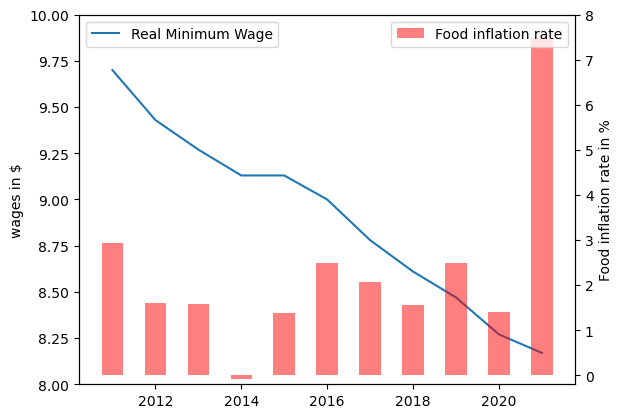

In [118]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(Year, real_minimum_wage_list) 
ax1.set_ylabel('wages in $')
ax1.set_ylim(8, 10)
ax1.legend(['Real Minimum Wage'], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
#ax2.bar(Year, inflation_list, width=0.5, alpha=0.5, color='orange')
ax2.bar(Year, inflation_list_general, width=0.5, alpha=0.5, color='red')
# turn off grid #2
ax2.grid(False) 
ax2.set_ylabel('Food inflation rate in %')
ax2.set_ylim(-0.2, 8.0)
ax2.legend(['Food inflation rate'], loc="upper right")
#plt.savefig("C:\Data Analytic\Project-1\Inflation and wage.png")
plt.show()

This graph shows how food inflation related with real minimum wage. You can see the wages decrease faster when the food inflation is higher and vice versa. The relationship between food inflation and real minimum wage is closer than the relationship between food inflation and inflation in general. How interesting is that!